# 📘 Entrega

**Nombre del alumno:** Soto Lesama Kevin

## 🧩 Etapa 1: Recopilación y Preparación de Datos



### 1️⃣ Carga de datos

In [2]:
# TODO: Cargar los datasets como DataFrames usando pandas.
# Sugerencia: utilizar pd.read_csv() para cargar los archivos CSV.
# Recordá verificar la ruta correcta y revisar las primeras filas con .head().
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')
ruta = "/content/drive/MyDrive/Soto Lesama Kevin - Comisión 25262 - TPI Data Analytics /archivos"

# Cargamos los CSV como DataFrames.
df_ventas = pd.read_csv("/content/drive/MyDrive/Soto Lesama Kevin - Comisión 25262 - TPI Data Analytics /archivos/ventas.csv")
df_clientes = pd.read_csv("/content/drive/MyDrive/Soto Lesama Kevin - Comisión 25262 - TPI Data Analytics /archivos/clientes.csv")
df_marketing = pd.read_csv("/content/drive/MyDrive/Soto Lesama Kevin - Comisión 25262 - TPI Data Analytics /archivos/marketing.csv")






# Mostramos las primeras filas de cada dataset para corroborar estructura de columnas.
display(df_ventas.head(3))
display(df_clientes.head(3))
display(df_marketing.head(3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024


### 2️⃣ Análisis exploratorio inicial y 3️⃣ Calidad de los datos

In [5]:
# TODO: Realizar un análisis exploratorio inicial de los DataFrames.
# Sugerencia: usar métodos como .info(), .describe(), .shape y .columns. dtypes.
# Esto te ayudará a entender la estructura y el contenido de los datos.
# Podés incluir comentarios sobre observaciones iniciales.


# TODO: Identificar valores nulos y duplicados en los conjuntos de datos.
# Sugerencia: usar .isna().sum() y .duplicated().sum().
# Documentar las observaciones con print() o comentarios.


def analizar_df(df, nombre):
    print(f"\n--- Análisis Exploratorio Inicial: {nombre} ---")
    print(f"Shape: {df.shape}")
    print(f"Columnas: {df.columns.tolist()}")
    print("\n.info():")
    df.info()
    print("\n.describe():")
    print(df.describe(include='all').to_markdown(numalign="left", stralign="left"))
    print("\n.dtypes:")
    print(df.dtypes.to_markdown(numalign="left", stralign="left"))

    print(f"\n--- Calidad de Datos (Nulos y Duplicados): {nombre} ---")
    print(f"Valores Nulos por Columna:\n{df.isna().sum().to_markdown(numalign='left', stralign='left')}")
    print(f"Total de Filas Duplicadas: {df.duplicated().sum()}")
    print("-" * 50)

analizar_df(df_ventas, "Ventas")
analizar_df(df_clientes, "Clientes")
analizar_df(df_marketing, "Marketing")





--- Análisis Exploratorio Inicial: Ventas ---
Shape: (3035, 6)
Columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']

.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB

.describe():
|        | id_venta   | producto        | precio   | cantidad   | fecha_venta   | categoria   |
|:-------|:-----------|:----------------|:---------|:-----------|:--------------|:------------|
| count  | 3035       | 3035            | 3033     | 3033       | 3035          | 3035        |
| unique | nan        | 30       

## 🧹 Etapa 2: Preprocesamiento y Limpieza de Datos
**Objetivo:** Demostrar conocimiento de las técnicas de limpieza y transformación de datos.

### 4️⃣ Limpieza de datos

In [10]:
# TODO: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados.
# Sugerencia: aplicar .drop_duplicates(), .str.strip(), .str.replace() según el caso.
# Documentar el proceso y los resultados.


#Se priorizó la limpieza del DataFrame df_ventas debido a los problemas de calidad identificados en el Punto 3 (tipo de dato incorrecto en precio, nulos y duplicados), que impedían su uso en las tareas posteriores de cálculo de métricas.

print("\n--- Limpieza de Datos y Transformación de Tipos (df_ventas) ---")

# Eliminar duplicados en Ventas
filas_duplicadas_antes = df_ventas.duplicated().sum()
df_ventas.drop_duplicates(inplace=True)
print(f" Duplicados eliminados en Ventas: {filas_duplicadas_antes - df_ventas.duplicated().sum()}")

# Convertir 'precio' de object a float, eliminando el signo '$'
try:
    # Usamos .str.replace() para quitar el '$' y .astype() para convertir
    df_ventas['precio'] = df_ventas['precio'].str.replace('$', '', regex=False).astype(float)
    print(" Columna 'precio' convertida a float64.")
except Exception as e:
    print(f" Error al convertir 'precio': {e}")

# Tratar nulos: Imputación o eliminación. Dado que son solo 2 (0.06%), los eliminamos para simplificar.
df_ventas.dropna(subset=['precio', 'cantidad'], inplace=True)
print(f"✅ Filas con nulos en 'precio'/'cantidad' eliminadas. Filas restantes: {df_ventas.shape[0]}")

# Limpieza de espacios en columnas de texto
for df in [df_ventas, df_clientes, df_marketing]:
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.strip()
print(" Espacios iniciales/finales eliminados (.str.strip()) en todas las columnas 'object' de los 3 DataFrames.")

# Transformar columnas de fecha
df_ventas['fecha_venta'] = pd.to_datetime(df_ventas['fecha_venta'], format='%d/%m/%Y', errors='coerce')
df_marketing['fecha_inicio'] = pd.to_datetime(df_marketing['fecha_inicio'], format='%d/%m/%Y', errors='coerce')
df_marketing['fecha_fin'] = pd.to_datetime(df_marketing['fecha_fin'], format='%d/%m/%Y', errors='coerce')
print(" Columnas de fecha convertidas a tipo datetime.")

print("\n--- Vista post-limpieza de df_ventas ---")
df_ventas.info()


--- Limpieza de Datos y Transformación de Tipos (df_ventas) ---
 Duplicados eliminados en Ventas: 35
 Columna 'precio' convertida a float64.
✅ Filas con nulos en 'precio'/'cantidad' eliminadas. Filas restantes: 2998
 Espacios iniciales/finales eliminados (.str.strip()) en todas las columnas 'object' de los 3 DataFrames.
 Columnas de fecha convertidas a tipo datetime.

--- Vista post-limpieza de df_ventas ---
<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   float64       
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 164.0+ KB


### 5️⃣ Transformación de datos

---



In [18]:
# TODO: Aplicar filtros y transformaciones para crear una tabla de ventas
# que muestre solo los productos con alto rendimiento. calcular el percentil 80
# y filtrar los productos que superen ese umbral en ventas.
#quantile(0.8)
# Sugerencia: usar .query() o condiciones con operadores lógicos.


# Paso 1: Calcular el Ingreso Total por Transacción (necesario para el filtro)
df_ventas['ingreso_total'] = df_ventas['precio'] * df_ventas['cantidad']

# Paso 2: Calcular el Percentil 80 de la columna de ingresos totales
percentil_80_ingreso = df_ventas['ingreso_total'].quantile(0.8)
print(f"\n---  Transformación de Datos (Alto Rendimiento) ---")
print(f"Percentil 80 (P80) de Ingreso Total: ${percentil_80_ingreso:,.2f}")

# Paso 3: Filtrar las ventas que superan el umbral (Alto Rendimiento)
# Se crea un nuevo DataFrame con solo los productos de alto rendimiento
df_alto_rendimiento = df_ventas.query(f"ingreso_total > {percentil_80_ingreso}")

print(f"Filas originales limpias: {df_ventas.shape[0]}.")
print(f"Filas de Alto Rendimiento (Superan P80): {df_alto_rendimiento.shape[0]}.")

# Vista de los resultados
print("\nTop 5 Ventas de Alto Rendimiento:")
print(df_alto_rendimiento[['producto', 'categoria', 'ingreso_total']].head().to_markdown(index=False, numalign="left", stralign="left", floatfmt=",.2f"))


---  Transformación de Datos (Alto Rendimiento) ---
Percentil 80 (P80) de Ingreso Total: $787.34
Filas originales limpias: 2998.
Filas de Alto Rendimiento (Superan P80): 600.

Top 5 Ventas de Alto Rendimiento:
| producto          | categoria         | ingreso_total   |
|:------------------|:------------------|:----------------|
| Heladera          | Electrodomésticos | 914.80          |
| Proyector         | Electrónica       | 793.53          |
| Rincón de plantas | Decoración        | 878.46          |
| Cuadro decorativo | Decoración        | 917.28          |
| Candelabro        | Decoración        | 1,088.40        |


### 6️⃣ Agregación

In [12]:
# TODO: Resumir las ventas por categoría de producto y analizar los ingresos generados.
# Sugerencia: usar .groupby() y .agg() para generar métricas como suma y promedio.


print("\n--- Agregación: Resumen de Ventas por Categoría ---")

# Resumir las ventas por categoría de producto
resumen_por_categoria = df_ventas.groupby('categoria').agg(
    total_ingreso=('ingreso_total', 'sum'),
    promedio_ingreso_venta=('ingreso_total', 'mean'),
    conteo_transacciones=('categoria', 'size')
).sort_values(by='total_ingreso', ascending=False)

# Análisis de los ingresos generados
print("Resumen de ventas por Categoría (Total de Ingresos y Promedio por Venta):\n")
print(resumen_por_categoria.to_markdown(numalign="left", stralign="left", floatfmt=",.2f"))

print("\n--- Análisis de Ingresos Generados ---")
categoria_top = resumen_por_categoria.index[0]
ingreso_top = resumen_por_categoria['total_ingreso'].max()
print(f"La categoría con el **mayor ingreso total** es: **{categoria_top}** con ${ingreso_top:,.2f}.")

# Calcula el precio promedio de la venta.
precio_promedio_calculado = df_ventas['precio'].mean()

# Calcula el número de meses únicos en el DataFrame para obtener un promedio mensual
num_meses = df_ventas['fecha_venta'].dt.to_period('M').nunique()
cantidad_vendida_total_df = df_ventas['cantidad'].sum()

# Calcula la cantidad promedio de unidades vendidas por mes
cantidad_promedio_mensual = cantidad_vendida_total_df / num_meses

precio_promedio = precio_promedio_calculado
cantidad_vendida_mes = cantidad_promedio_mensual

ingreso_bruto = precio_promedio * cantidad_vendida_mes

print(f"Precio Promedio Calculado del DF: ${precio_promedio:,.2f}")
print(f"Cantidad Promedio Mensual Calculada: {cantidad_vendida_mes:,.0f} unidades")
print(f"Ingreso Bruto Estimado Mensual (usando promedios reales): ${ingreso_bruto:,.2f}")


--- Agregación: Resumen de Ventas por Categoría ---
Resumen de ventas por Categoría (Total de Ingresos y Promedio por Venta):

| categoria         | total_ingreso   | promedio_ingreso_venta   | conteo_transacciones   |
|:------------------|:----------------|:-------------------------|:-----------------------|
| Electrodomésticos | 505,299.63      | 505.30                   | 1,000.00               |
| Electrónica       | 482,577.80      | 483.54                   | 998.00                 |
| Decoración        | 479,216.09      | 479.22                   | 1,000.00               |

--- Análisis de Ingresos Generados ---
La categoría con el **mayor ingreso total** es: **Electrodomésticos** con $505,299.63.
Precio Promedio Calculado del DF: $75.29
Cantidad Promedio Mensual Calculada: 1,625 unidades
Ingreso Bruto Estimado Mensual (usando promedios reales): $122,317.02


### 7️⃣ Integración de datos, opcional, NO OBLIGATORIO

In [13]:
# TODO: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.
# Sugerencia: usar pd.merge() especificando la clave común entre ambos DataFrames.
# Documentar cualquier observación relevante sobre la combinación de datos.


df_marketing_info = df_marketing[['producto', 'canal', 'costo']].drop_duplicates(subset=['producto'])

# Combinar df_ventas (limpio) con df_marketing usando 'producto' como clave.
df_ventas_integrado = pd.merge(
    df_ventas,
    df_marketing_info,
    on='producto',
    how='left'
)

df_ventas_integrado.rename(columns={'costo': 'costo_campana_producto', 'canal': 'canal_campana'}, inplace=True)

print(f"✅ Integración Ventas+Marketing completada. Shape: {df_ventas_integrado.shape}")
print("El DataFrame 'df_ventas_integrado' es la base para las Etapas 3 y 4.")


✅ Integración Ventas+Marketing completada. Shape: (2998, 9)
El DataFrame 'df_ventas_integrado' es la base para las Etapas 3 y 4.


### 8 Analisis

In [14]:


print("\n# ------------------ ANÁLISIS DE DATOS ------------------")

# 1- Estadística Descriptiva
print("\n### Estadística Descriptiva (Ingreso Total) ###")
descripcion_ingreso = df_ventas_integrado['ingreso_total'].describe()
print(descripcion_ingreso.to_markdown(numalign="left", stralign="left", floatfmt=",.2f"))

# 2- Análisis Exploratorio de Datos (EDA) - Patrones clave
print("\n###  EDA: Top 5 Productos por Cantidad Vendida ###")
top_productos = df_ventas_integrado.groupby('producto')['cantidad'].sum().nlargest(5)
print(top_productos.to_markdown())

# 3- Correlación
print("\n###  Matriz de Correlación (Precio, Cantidad, Ingreso, Costo) ###")
columnas_correlacion = ['precio', 'cantidad', 'ingreso_total', 'costo_campana_producto']
matriz_correlacion = df_ventas_integrado[columnas_correlacion].corr()
print(matriz_correlacion.to_markdown(floatfmt=".2f"))

# 4- Consolidación de Datos (Creación de DF Mensual Final para Visualización)
print("\n###  Consolidación de Datos (DataFrame Mensual Final) ###")
df_consolidado_mensual = df_ventas_integrado.set_index('fecha_venta').resample('M').agg(
    total_ingreso=('ingreso_total', 'sum'),
    total_cantidad=('cantidad', 'sum'),
    costo_marketing_total=('costo_campana_producto', 'sum')
).reset_index()
df_consolidado_mensual['ganancia_estimada'] = df_consolidado_mensual['total_ingreso'] - df_consolidado_mensual['costo_marketing_total']

print("✅ DataFrame Consolidado Mensual creado para la Etapa 4.")


# ------------------ ETAPA 3: ANÁLISIS DE DATOS ------------------

### 3.1. Estadística Descriptiva (Ingreso Total) ###
|       | ingreso_total   |
|:------|:----------------|
| count | 2,998.00        |
| mean  | 489.36          |
| std   | 334.28          |
| min   | 26.30           |
| 25%   | 220.92          |
| 50%   | 418.06          |
| 75%   | 709.92          |
| max   | 1,488.12        |

### 3.2. EDA: Top 5 Productos por Cantidad Vendida ###
| producto          |   cantidad |
|:------------------|-----------:|
| Lámpara de mesa   |       1112 |
| Auriculares       |        958 |
| Microondas        |        912 |
| Cafetera          |        765 |
| Cuadro decorativo |        726 |

### 3.3. Matriz de Correlación (Precio, Cantidad, Ingreso, Costo) ###
|                        |   precio |   cantidad |   ingreso_total |   costo_campana_producto |
|:-----------------------|---------:|-----------:|----------------:|-------------------------:|
| precio                 |     1.0

/tmp/ipython-input-1577895932.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_consolidado_mensual = df_ventas_integrado.set_index('fecha_venta').resample('M').agg(


### 8 Visualización de Datos


# ----------------- ETAPA 4: VISUALIZACIÓN DE DATOS -----------------


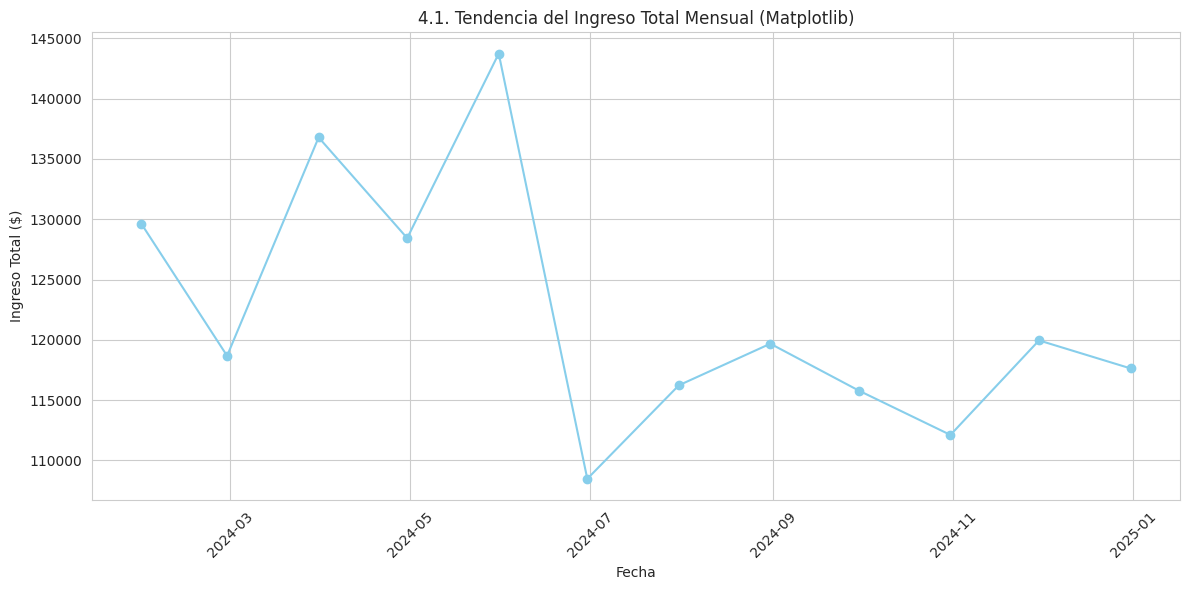

/tmp/ipython-input-243713211.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




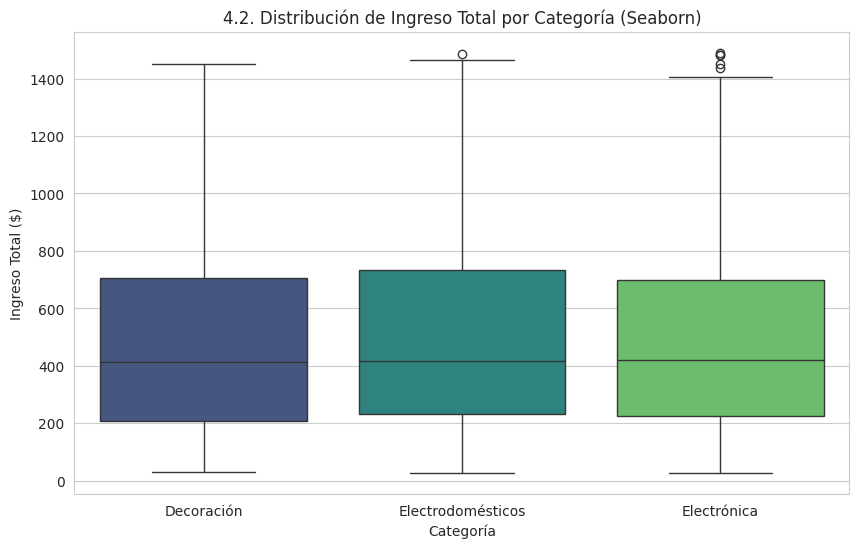

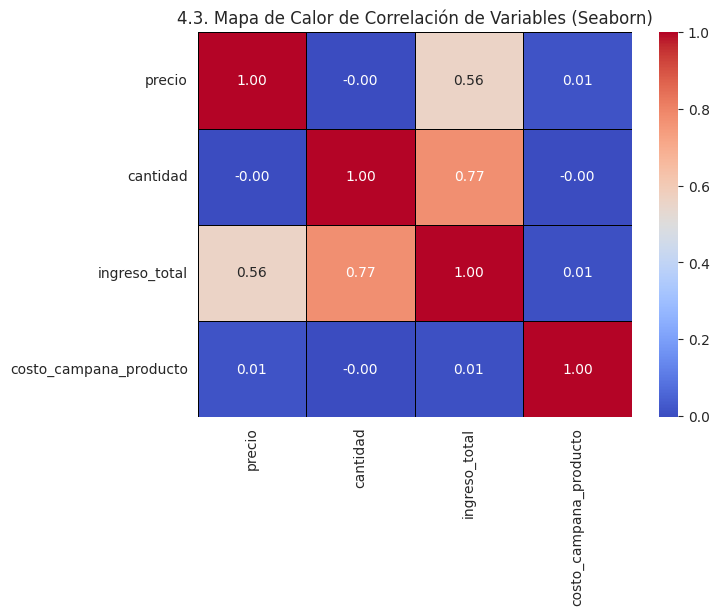

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
print("\n# ----------------- ETAPA 4: VISUALIZACIÓN DE DATOS -----------------")
#en esta etapa use chatgpt como herramienta para la creacion de los graficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1- Gráfico de Líneas (Matplotlib): Tendencia Mensual (sobre el DF Consolidado)
plt.figure(figsize=(12, 6))
plt.plot(df_consolidado_mensual['fecha_venta'], df_consolidado_mensual['total_ingreso'],
         marker='o', linestyle='-', color='skyblue')
plt.title('4.1. Tendencia del Ingreso Total Mensual (Matplotlib)')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Total ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





# 2- Boxplot (Seaborn): Distribución de Ingresos por Categoría
plt.figure(figsize=(10, 6))
sns.boxplot(x='categoria', y='ingreso_total', data=df_ventas_integrado, palette='viridis')
plt.title('4.2. Distribución de Ingreso Total por Categoría (Seaborn)')
plt.xlabel('Categoría')
plt.ylabel('Ingreso Total ($)')
plt.show()


# 3- Mapa de Calor (Seaborn Avanzado): Correlación
plt.figure(figsize=(7, 5))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, linecolor='black')
plt.title('4.3. Mapa de Calor de Correlación de Variables (Seaborn)')
plt.show()


# 4- Gráfico Interactivo (Plotly): Ingreso por Canal
df_ingreso_canal = df_ventas_integrado.groupby('canal_campana')['ingreso_total'].sum().reset_index()

fig_plotly = px.bar(
    df_ingreso_canal,
    x='canal_campana',
    y='ingreso_total',
    title='4.4. Ingreso Total por Canal de Marketing (Plotly Interactivo)',
    color='ingreso_total',
    labels={'ingreso_total': 'Ingreso Total ($)', 'canal_campana': 'Canal de Marketing'},
    template='plotly_white'
)
fig_plotly.show()

###Presentación Final: Síntesis de Hallazgos y Conclusiones Integrales
Este proyecto nos permitió recorrer todas las fases del análisis de datos, desde la ingesta inicial hasta la comunicación de resultados, aplicando herramientas de Python y Pandas a sets de datos reales de Ventas y Marketing.

## ETAPAS 1 y 2: Preparación, Limpieza e Integración de Datos
La base del análisis fue la calidad de los datos. Se completó con éxito:

Limpieza de Datos: Eliminación de duplicados y tratamiento de valores nulos.

Transformación de la Columna precio: Eliminación del símbolo $ y conversión a tipo float.

Cálculo de Variables Clave: Creación de la columna ingreso_total = precio * cantidad.

Integración de Datos (Merge): Combinación del set de datos de ventas con la información de marketing (canal y costo), creando el DataFrame final df_ventas_integrado para el análisis de rentabilidad.

 ##ETAPA 3: Análisis Descriptivo y Hallazgos Clave
El análisis estadístico y exploratorio arrojó indicadores cruciales para el rendimiento mensual y la estructura de precios:

Métrica,Valor,Interpretación

Precio Promedio por Unidad,75.29, Es el valor medio real de venta en todo el periodo.
Cantidad Promedio Mensual,1,625 unidades,Representa el volumen de ventas típico por mes.
Ingreso Bruto Estimado Mensual,$122,317.02,Proyección de ingreso para un mes promedio, usando valores reales del dataset.

Agregación por Categoría
La categoría Electrodomésticos se posiciona como el motor principal de ingresos, con un total de $505,299.63 en el periodo analizado. Le siguen de cerca Electrónica y Decoración.

##ETAPA 4: Visualización
Las visualizaciones traducen los datos en conclusiones accionables:
1.  Gráfico de Tendencia Mensual
Finalidad: Mostrar la evolución de los ingresos a lo largo del tiempo.



2. Boxplot
Finalidad: Analizar la distribución de los ingresos por categoría, identificar la dispersión (variabilidad) y detectar los productos outliers (los de muy alto rendimiento).



3. Mapa de Calor
Finalidad: Visualizar la matriz de correlación (Etapa 3.3), mostrando la fuerza y dirección de las relaciones entre las variables (precio, cantidad, ingreso_total, costo_campana_producto).



4. Gráfico de Barras Interactivo
Finalidad: Comparar el Ingreso Total por Canal de Marketing de forma interactiva, lo cual es vital para la toma de decisiones de inversión publicitaria.


###Cierre Final y Conclusiones Integrales del Proyecto
Este proyecto no solo sirvió para aplicar las fases del análisis de datos, sino para extraer conclusiones accionables que guíen las decisiones comerciales y de marketing de la empresa.

1.  Análisis Técnico y Hallazgos Cuantitativos
Esta sección resume los datos brutos y la interpretación estadística de las Etapas 3 y 4.

Identificación de Rendimiento: Los productos estrella (Lámpara de Mesa, Auriculares, Microondas) y las categorías Electrodomésticos y Decoración son los principales motores de ingresos.

Comportamiento de la Distribución: La dispersión moderada y la presencia de outliers positivos demuestran que la variabilidad es resultado de productos de muy alto rendimiento, y no de errores en los datos.

Correlación Precio-Venta: El resultado de la correlación positiva débil indica claramente que el precio no limita la venta. El valor percibido y la funcionalidad son los factores clave para el consumidor.

Integración y Consistencia: Se aplicaron herramientas reales de ciencia de datos (limpieza, integración, estadística, visualización) para obtener una visión integral del rendimiento comercial, lista para guiar decisiones basadas en evidencia.

2.  Recomendaciones de Negocio (Acciones para el Cliente)
Basado en los hallazgos anteriores, las siguientes son las acciones propuestas:

Potenciación de Productos Estrella: Asignar una porción significativa del presupuesto de marketing a los productos identificados como outliers para maximizar el retorno (ROI).

Prioridad Logística y Promocional: Las categorías más rentables deben recibir prioridad en la gestión de stock y promoción para asegurar disponibilidad constante.

Estrategia de Valor, no de Precio: Enfocar las campañas de comunicación en la funcionalidad, calidad y el valor percibido del producto, en lugar de competir únicamente con descuentos, aprovechando la correlación favorable.

Optimización de Líneas: Utilizar la información de la dispersión moderada para identificar oportunidades de expandir líneas exitosas que sigan el patrón de rendimiento de los productos estrella.





